In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [31]:
trial_idx=8
paper='1106.6060'

# Code-generation prompts

In [32]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [33]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [34]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me analyze this
Let me analyze this Hamiltonian systematically.

First, I need to identify the dimension and basis order.

From the Hamiltonian, we can see that $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$. This means we have three orbital flavors (p_x, p_y, and d) and also a spin index s.

So the Hamiltonian will have flavors for:
1. Orbital (3 types: p_x, p_y, d)
2. Spin (2 types: up, down)

Therefore, D = (2, 3) = (|spin|, |orbital|)

The basis order should be:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

Now, let's identify the interacting and non-interacting terms.

First, I'll identify the expectation value dependent terms in the Hamiltonian.

From the definitions in the Hamiltonian:
- $n^p$ is the total density of holes on the oxygen sites: $n^p\equiv (n_{x\uparrow}^p+n_{x\downarrow}^{p}) + (n_{y\uparrow}^p + n_{y\downarrow}^p)$
- $\eta$ is the nematic or

In [35]:
print(generated_code['thinking'])

Let me analyze this Hamiltonian systematically.

First, I need to identify the dimension and basis order.

From the Hamiltonian, we can see that $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$. This means we have three orbital flavors (p_x, p_y, and d) and also a spin index s.

So the Hamiltonian will have flavors for:
1. Orbital (3 types: p_x, p_y, d)
2. Spin (2 types: up, down)

Therefore, D = (2, 3) = (|spin|, |orbital|)

The basis order should be:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

Now, let's identify the interacting and non-interacting terms.

First, I'll identify the expectation value dependent terms in the Hamiltonian.

From the definitions in the Hamiltonian:
- $n^p$ is the total density of holes on the oxygen sites: $n^p\equiv (n_{x\uparrow}^p+n_{x\downarrow}^{p}) + (n_{y\uparrow}^p + n_{y\downarrow}^p)$
- $\eta$ is the nematic order parameter defined in Eq.\eqref{eq:eta} (this equation is not provided

In [36]:
print(generated_code['text'])

# ANSWER:

1) Number of Flavors, D = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

2) EXP-VAL DEPENDENT TERMS: {
   "n^p": "Total density of holes on oxygen sites: sum of <p_x^†p_x> and <p_y^†p_y> for both spins",
   "η": "Nematic order parameter: difference between p_x and p_y occupation"
}

TERMS:
- γ_1(k_x) = -2t_{pd}cos(k_x/2) -> H[s, 0, s, 2, k] and H[s, 2, s, 0, k], NI (p_x-d hopping)
- γ_1(k_y) = -2t_{pd}cos(k_y/2) -> H[s, 1, s, 2, k] and H[s, 2, s, 1, k], NI (p_y-d hopping)
- γ_2(k) = -4t_{pp}cos(k_x/2)cos(k_y/2) -> H[s, 0, s, 1, k] and H[s, 1, s, 0, k], NI (p_x-p_y hopping)
- ξ_x = Δ + Ũ_p(n^p/4) - Ṽ_pp(η/4) - μ -> H[s, 0, s, 0, k], partially I (p_x orbital energy)
- ξ_y = Δ + Ũ_p(n^p/4) + Ṽ_pp(η/4) - μ -> H[s, 1, s, 1, k], partially I (p_y orbital energy)
- ξ_d = Ũ_d(n-n^p)/2 - μ -> H[s, 2, s, 2, k], partially I (d orbital energy)
- f(n^p, η) = -Ũ_p(n^p)²/8 + Ṽ_pp(η²)/8 - Ũ_d(n-n^p)²/4 -> constant energy shift, I

3) CODE:
```python
import numpy

In [37]:
code = utils_auto.extract_code(generated_code['text'])

In [38]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Emery model Hamiltonian for CuO2 planes with p_x, p_y, and d orbitals.
  
  Args:
    N_shell (int): Number of shells in the first Brillouin zone.
    parameters (dict): Dictionary containing model parameters.
    filling_factor (float): Filling factor for the system.
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
    self.lattice = 'square'
    self.D = (2, 3)  # (spin, orbital)
    self.basis_order = {'0': 'spin', '1': 'orbital'}
    # 0: spin - up, down
    # 1: orbital - p_x, p_y, d

    # Occupancy relevant parameters
    self.nu = filling_factor
    self.T = parameters.get('T', 0)  # temperature, default to 0
    self.a = parameters.get('a', 1.0)  # Lattice constant
    self.k_space = generate_k_space(self.lattice, N_shell, self.a)
    self.N_k = self.k_space.shape[0]

    # Model parameters
    self.Delta = parameters.get('Delta',

In [39]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_8.py


# Code evaluation

In [40]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [41]:
import importlib

In [42]:
module = importlib.import_module(code_path)

In [43]:
import HF

## Task 1: Check k-space

In [44]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

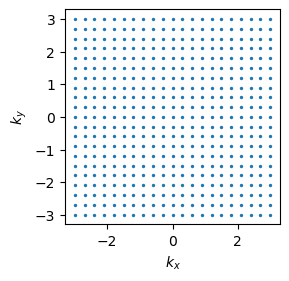

In [45]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [46]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [47]:
h_nonint = ham.generate_non_interacting()

In [48]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

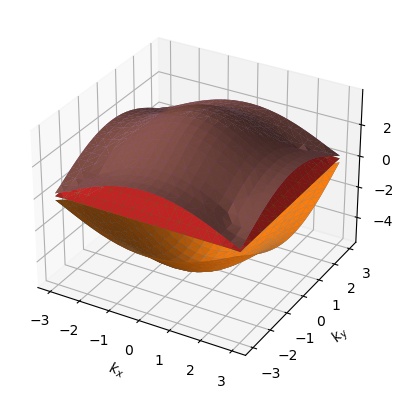

In [49]:
utils_auto.plot_2d_bandstructure(ham,en)

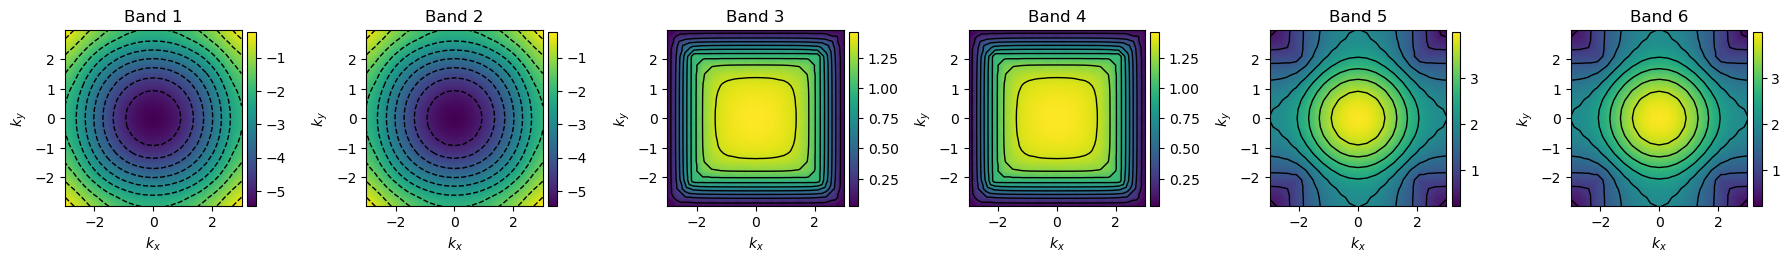

In [50]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [87]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':0.,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [88]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [89]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 2


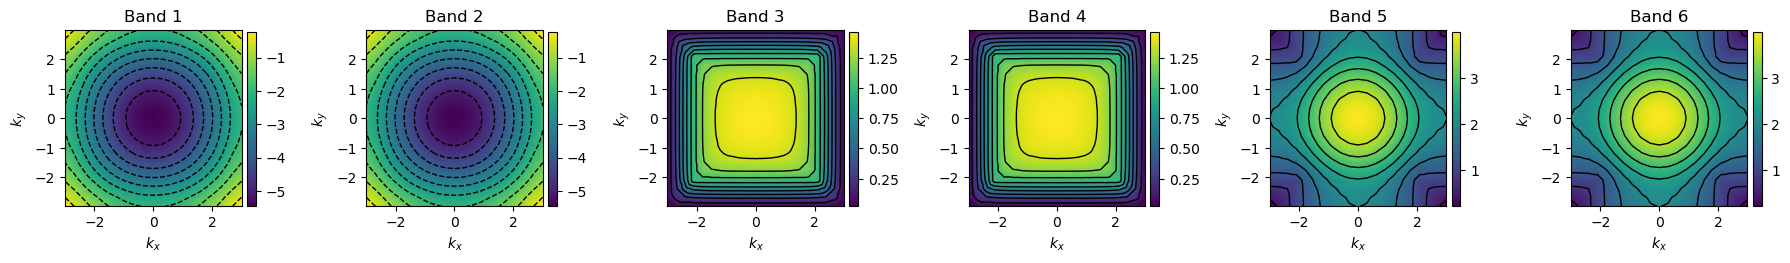

In [90]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [55]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [56]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [57]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 2


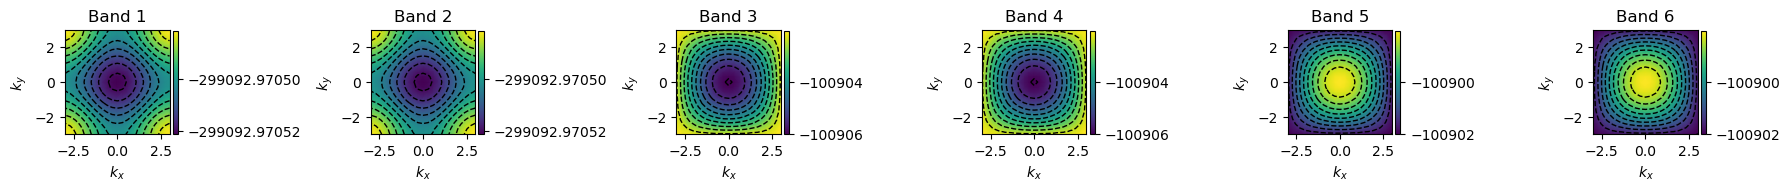

In [58]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [59]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 198186.94
U/T is 0.79
mean_U is 13130.22


# Auto eval

## Task 1

In [60]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let's analyze the
Let's analyze the provided image and Hamiltonian to determine if the image shows the correct momentum space mesh in the first Brillouin zone with the appropriate point group symmetry for the given problem.

From the problem, we have a Hamiltonian in momentum space for a square lattice. The Hamiltonian has terms involving:
- $\gamma_1(k_i) = -2t_{pd}\cos\frac{k_i}{2}$
- $\gamma_2(\kk) = -4t_{pp}\cos\frac{k_x}{2}\cos\frac{k_y}{2}$

These functional forms suggest we're dealing with a square lattice in real space, which corresponds to a square-shaped first Brillouin zone in momentum space.

Now, let's look at the image:

1. The image shows a grid of blue dots arranged in a square pattern.
2. The axes are labeled $k_x$ and $k_y$.
3. The limits of both axes are from approximately -3 to 3.
4. The dots form a regular grid covering the square region from (-3,-3) to (3,3).

For a square lattice with lattice constant $a$, the 

In [61]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [62]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me
Let me analyze the band structure plots provided in the image based on the given rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

In the plots, the Brillouin zone appears to be square-shaped with boundaries from approximately -π to π in both kx and ky directions (shown as -3 to 3 in the plot). This is consistent with what we expect for a square lattice, where the first Brillouin zone is a square in reciprocal space.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
- Bands 1 and 2: The highest energy regions (least negative, shown in yellow-green) are at the corners and edges of the Brillouin zone.
- Bands 3 and 4: The highest energy regions (yellow) are in the center square region.
- Bands 5 and 6: The highest energy regions (yellow) are at the center.

2.2

In [63]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [91]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu='1/3')
    )


#################### THINKING ####################

Let's systemat
Let's systematically evaluate the image based on the provided rubric for the Hartree-Fock calculation of a condensed matter system.

The image shows 6 panels labeled "Band 1" through "Band 6", each displaying a false color plot representing the energy levels across the first Brillouin zone for a square lattice. Each plot has axes labeled k_x and k_y, typically ranging from -2 to 2.

Let's go through the rubric step by step:

1. Identify the shape of the Brillouin zone boundary:
- The plots show a square-shaped region, which is consistent with the expected Brillouin zone for a square lattice. The boundaries are at approximately k_x, k_y = ±2, which forms a square. This matches what's expected for a square lattice. ✓

2. Examine the symmetry of the energy distribution:

2.1 Identify the highest energy regions (yellow):
- Band 1 & 2: Highest energy (yellow) regions are at the corners of the Brillouin zone
- Band 3 & 4: Hi

In [92]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [66]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper, nu='1/3',U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

I
I need to analyze this image showing a series of false color plots for interacting-renormalized band structure in the first Brillouin zone. Let me go through the rubric points systematically:

### 1. Identify the shape of the Brillouin zone boundary

Looking at all six band plots, I can see that the Brillouin zone is represented as a square with k_x and k_y axes ranging from approximately -2.5 to 2.5. This is consistent with the expected square lattice Brillouin zone for the problem described in the Hamiltonian.

### 2. Examine the symmetry of the energy distribution

#### 2.1 Identify the highest energy regions (yellow)
- In Bands 1-4: The highest energy regions (yellow) appear at the corners of the shown region
- In Bands 5-6: The highest energy regions (yellow) appear at the center of the Brillouin zone

#### 2.2 Trace the pattern of energy variation
- Bands 1-4 show circular/elliptical contours with the energy decreasing from t

In [67]:
answer4=utils_auto.extract_result_content(result4['text'])

In [68]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '8' saved to final_answer.yaml
